In [1]:
import openml
from openml.datasets.functions import list_datasets
import pandas as pd
import os, sys
from tqdm import tqdm 
from ticl.datasets import load_openml_list
import matplotlib.pyplot as plt
import seaborn as sns

root_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
os.chdir(f'{root_dir}/tabzilla/TabZilla')
sys.path.append(f'{root_dir}/tabzilla/TabZilla')

In [2]:
# load dids for openml_did.txt
with open(os.path.join(root_dir, 'tabzilla/TabZilla/openml_easy_import_list.txt'), 'r') as f:
    task_ids = f.read().splitlines()
    
dids = []
tabzilla_datasets = openml.tasks.get_tasks(task_ids, download_data=False, download_qualities=False)
for dataset in tqdm(tabzilla_datasets):
    dids.append(dataset.dataset_id)
    # get openml dataset name
    dataset_name = openml.datasets.get_dataset(dataset.dataset_id).name
    # print(f'{dataset_name} - {dataset.dataset_id}')
    print(dataset.dataset_id, dataset_name)


/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/functions.py:372: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/functions.py:382: FutureWarning: Task id must be specified as `int` from 0.14.0 onwards.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn

3 kr-vs-kp
6 letter
11 balance-scale
12 mfeat-factors
14 mfeat-fourier
15 breast-w
16 mfeat-karhunen
18 mfeat-morphological
22 mfeat-zernike
23 cmc
28 optdigits
29 credit-approval
31 credit-g
32 pendigits
37 diabetes
44 spambase
46 splice
50 tic-tac-toe
54 vehicle
151 electricity
182 satimage
188 eucalyptus
307 vowel
300 isolet
458 analcatdata_authorship
469 analcatdata_dmft
554 mnist_784
1049 pc4
1050 pc3
1053 jm1
1063 kc2
1067 kc1
1068 pc1
1590 adult
4134 Bioresponse
1510 wdbc
1489 phoneme
1494 qsar-biodeg
1497 wall-robot-navigation
1501 semeion
1480 ilpd
1485 madelon
1486 nomao
1487 ozone-level-8hr
1468 cnae-9
1475 first-order-theorem-proving
1462 banknote-authentication
1464 blood-transfusion-service-center
4534 PhishingWebsites
6332 cylinder-bands
1461 bank-marketing
4538 GesturePhaseSegmentationProcessed
1478 har
23381 dresses-sales
40499 texture
40668 connect-4
40966 MiceProtein
40982 steel-plates-fault
40994 climate-model-simulation-crashes
40983 wilt
40975 car
40984 segment
40

100%|██████████| 194/194 [00:00<00:00, 952.61it/s]

703 chscase_foot
524 pbc
562 cpu_small


In [3]:
dids

[3,
 6,
 11,
 12,
 14,
 15,
 16,
 18,
 22,
 23,
 28,
 29,
 31,
 32,
 37,
 44,
 46,
 50,
 54,
 151,
 182,
 188,
 307,
 300,
 458,
 469,
 554,
 1049,
 1050,
 1053,
 1063,
 1067,
 1068,
 1590,
 4134,
 1510,
 1489,
 1494,
 1497,
 1501,
 1480,
 1485,
 1486,
 1487,
 1468,
 1475,
 1462,
 1464,
 4534,
 6332,
 1461,
 4538,
 1478,
 23381,
 40499,
 40668,
 40966,
 40982,
 40994,
 40983,
 40975,
 40984,
 40979,
 40996,
 41027,
 23517,
 40923,
 40927,
 40978,
 40670,
 40701,
 44025,
 1596,
 1119,
 4135,
 40685,
 23512,
 40981,
 41169,
 41168,
 41166,
 41165,
 41150,
 41159,
 41161,
 41138,
 41142,
 41163,
 41164,
 41143,
 41146,
 1169,
 41167,
 41147,
 1044,
 5,
 1502,
 42727,
 41145,
 1477,
 1471,
 821,
 344,
 43466,
 23515,
 42,
 13,
 43,
 497,
 171,
 39,
 4535,
 1592,
 1099,
 42183,
 1,
 1509,
 1483,
 41434,
 7,
 9,
 24,
 25,
 27,
 30,
 35,
 40,
 41,
 49,
 51,
 55,
 61,
 1455,
 258,
 43611,
 1568,
 334,
 42855,
 1567,
 42184,
 40733,
 40683,
 163,
 1473,
 477,
 329,
 40664,
 40679,
 59,
 1118,
 

In [3]:
# Set the API key (if needed)
# openml.config.apikey = 'YOUR_API_KEY'

# Fetch all datasets
suite = openml.study.get_suite(293)
 
datasets = openml.tasks.get_tasks(suite.tasks, download_data=False, download_qualities=False)

# Filter datasets based on criteria
filtered_datasets = []

for dataset in tqdm(datasets):
    
    n_classes = len(dataset.class_labels)
    n_samples, n_features = dataset.get_X_and_y()[0].shape
    did = dataset.dataset_id
    
    print(f"n_classes {n_classes}, n_features {n_features}, n_samples {n_samples}")
    if (
        (n_features < 5000) and 
        (n_classes < 100) and 
        (1e2 <= n_samples <= 1e6) and 
        (not did in dids)
    ):
        filtered_datasets.append({
            'id': did,
            # 'name': dataset.name,
            'n_features': n_features,
            'n_classes': n_classes,
            'n_samples': n_samples
        })

# Convert to DataFrame for easier viewing
df_filtered = pd.DataFrame(filtered_datasets)
df_filtered.to_csv(f'{root_dir}/tabpfn_training_amueller/mothernet/trials/filtered_datasets.csv', index=False)

  0%|          | 0/208 [00:00<?, ?it/s]/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(
/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using nu

n_classes 6, n_features 38, n_samples 898
n_classes 26, n_features 16, n_samples 20000
n_classes 3, n_features 4, n_samples 625
n_classes 2, n_features 9, n_samples 699
n_classes 3, n_features 9, n_samples 1473
n_classes 2, n_features 22, n_samples 8124
n_classes 5, n_features 8, n_samples 12960
n_classes 10, n_features 64, n_samples 5620
n_classes 5, n_features 10, n_samples 5473
n_classes 10, n_features 16, n_samples 10992
n_classes 2, n_features 8, n_samples 768
n_classes 19, n_features 35, n_samples 683
n_classes 2, n_features 57, n_samples 4601
n_classes 3, n_features 60, n_samples 3190


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 9, n_samples 958
n_classes 3, n_features 40, n_samples 5000
n_classes 2, n_features 8, n_samples 45312
n_classes 10, n_features 10, n_samples 829201
n_classes 10, n_features 8, n_samples 1484
n_classes 6, n_features 36, n_samples 6430
n_classes 29, n_features 8, n_samples 4177
n_classes 18, n_features 6, n_samples 28056
n_classes 3, n_features 16, n_samples 1340
n_classes 5, n_features 19, n_samples 736


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 13, n_features 74, n_samples 45164
n_classes 4, n_features 29, n_samples 3772
n_classes 11, n_features 12, n_samples 990
n_classes 2, n_features 6, n_samples 11183
n_classes 2, n_features 49, n_samples 937
n_classes 2, n_features 6, n_samples 556
n_classes 2, n_features 6, n_samples 601
n_classes 2, n_features 6, n_samples 554
n_classes 2, n_features 20, n_samples 1000
n_classes 2, n_features 37, n_samples 1458
n_classes 2, n_features 21, n_samples 10885


 17%|█▋        | 36/208 [00:00<00:05, 34.16it/s]

n_classes 10, n_features 784, n_samples 70000
n_classes 2, n_features 36, n_samples 5589
n_classes 2, n_features 167, n_samples 6598
n_classes 5, n_features 32, n_samples 9873
n_classes 2, n_features 10, n_samples 19020


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545
n_classes 5, n_features 12, n_samples 1100


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10935, n_samples 1545
n_classes 2, n_features 37, n_samples 1563
n_classes 2, n_features 5, n_samples 1000
n_classes 2, n_features 38, n_samples 9466
n_classes 11, n_features 7, n_samples 164860
n_classes 2, n_features 25, n_samples 1000
n_classes 2, n_features 48, n_samples 15000
n_classes 2, n_features 8, n_samples 8192
n_classes 2, n_features 10, n_samples 40768
n_classes 2, n_features 7, n_samples 4052
n_classes 2, n_features 40, n_samples 13750
n_classes 2, n_features 12, n_samples 8192
n_classes 2, n_features 6, n_samples 3107


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10, n_samples 1000
n_classes 2, n_features 32, n_samples 8192
n_classes 100, n_features 64, n_samples 1600


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 1776, n_samples 3751
n_classes 2, n_features 3, n_samples 2178
n_classes 2, n_features 21, n_samples 1109
n_classes 2, n_features 10, n_samples 40768
n_classes 2, n_features 5, n_samples 7129
n_classes 2, n_features 8, n_samples 8192


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 26, n_features 617, n_samples 7797
n_classes 2, n_features 8, n_samples 8192
n_classes 2, n_features 6, n_samples 9517
n_classes 2, n_features 16, n_samples 22784
n_classes 2, n_features 8, n_samples 20640
n_classes 10, n_features 14, n_samples 263256
n_classes 2, n_features 32, n_samples 8192
n_classes 2, n_features 50, n_samples 1000
n_classes 2, n_features 18, n_samples 16599
n_classes 2, n_features 14, n_samples 6574
n_classes 2, n_features 20, n_samples 7400
n_classes 2, n_features 5, n_samples 3848


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 10, n_samples 40768
n_classes 2, n_features 15, n_samples 1161
n_classes 2, n_features 25, n_samples 1000
n_classes 2, n_features 4, n_samples 8641
n_classes 2, n_features 33, n_samples 1302
n_classes 2, n_features 5, n_samples 1156
n_classes 2, n_features 30, n_samples 11055
n_classes 10, n_features 35, n_samples 2126
n_classes 2, n_features 14, n_samples 14980
n_classes 6, n_features 51, n_samples 6118
n_classes 18, n_features 6, n_samples 28056
n_classes 2, n_features 72, n_samples 2534
n_classes 2, n_features 41, n_samples 1055
n_classes 2, n_features 21, n_samples 8192
n_classes 2, n_features 20, n_samples 7400
n_classes 4, n_features 24, n_samples 5456


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 10, n_features 256, n_samples 1593
n_classes 2, n_features 3, n_samples 245057
n_classes 2, n_features 33, n_samples 1941
n_classes 22, n_features 4, n_samples 149332
n_classes 9, n_features 14, n_samples 9961
n_classes 2, n_features 5, n_samples 15545
n_classes 10, n_features 7, n_samples 10218


 50%|█████     | 105/208 [00:15<00:04, 24.78it/s]/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` w

n_classes 6, n_features 561, n_samples 10299
n_classes 11, n_features 40, n_samples 5500
n_classes 6, n_features 60, n_samples 600
n_classes 2, n_features 5, n_samples 500
n_classes 4, n_features 70, n_samples 841
n_classes 6, n_features 4, n_samples 797
n_classes 2, n_features 9, n_samples 672
n_classes 2, n_features 21, n_samples 522
n_classes 2, n_features 4, n_samples 1372
n_classes 2, n_features 100, n_samples 1212
n_classes 2, n_features 10, n_samples 583


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 500, n_samples 2600
n_classes 2, n_features 30, n_samples 569


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 20, n_features 1300, n_samples 571
n_classes 2, n_features 37, n_samples 540
n_classes 6, n_features 33, n_samples 2796
n_classes 2, n_features 12, n_samples 500
n_classes 10, n_features 7, n_samples 500
n_classes 2, n_features 120, n_samples 8378
n_classes 2, n_features 10, n_samples 508
n_classes 2, n_features 100, n_samples 500
n_classes 2, n_features 7, n_samples 500
n_classes 2, n_features 21, n_samples 528
n_classes 2, n_features 6, n_samples 625
n_classes 2, n_features 18, n_samples 1945
n_classes 2, n_features 20, n_samples 506


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 11, n_samples 576
n_classes 2, n_features 8, n_samples 782
n_classes 2, n_features 9, n_samples 950
n_classes 2, n_features 5, n_samples 500
n_classes 2, n_features 7, n_samples 500
n_classes 2, n_features 50, n_samples 500
n_classes 2, n_features 10, n_samples 500
n_classes 2, n_features 50, n_samples 500
n_classes 2, n_features 36, n_samples 527
n_classes 2, n_features 4, n_samples 559
n_classes 2, n_features 4, n_samples 559
n_classes 2, n_features 4, n_samples 559
n_classes 2, n_features 4, n_samples 559
n_classes 2, n_features 68, n_samples 10108


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 1617, n_samples 4229


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 1000, n_samples 1600
n_classes 2, n_features 20, n_samples 1600
n_classes 2, n_features 20, n_samples 1600
n_classes 2, n_features 20, n_samples 1600
n_classes 2, n_features 20, n_samples 1600
n_classes 2, n_features 20, n_samples 1600
n_classes 2, n_features 10, n_samples 1324
n_classes 2, n_features 9, n_samples 973
n_classes 2, n_features 20, n_samples 5000
n_classes 2, n_features 3, n_samples 2201


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 44, n_samples 959
n_classes 2, n_features 10, n_samples 1124
n_classes 2, n_features 6, n_samples 88588
n_classes 2, n_features 5, n_samples 4839
n_classes 2, n_features 18, n_samples 540
n_classes 3, n_features 180, n_samples 3186


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 46, n_features 1024, n_samples 92000


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 10, n_features 3072, n_samples 60000


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 8, n_features 77, n_samples 1080
n_classes 7, n_features 27, n_samples 1941


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 1558, n_samples 3279
n_classes 3, n_features 27, n_samples 10936


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 7, n_features 6373, n_samples 945
n_classes 3, n_features 49, n_samples 101766
n_classes 72, n_features 16, n_samples 5665
n_classes 7, n_features 11, n_samples 4898
n_classes 8, n_features 29, n_samples 100968
n_classes 10, n_features 24, n_samples 3200
n_classes 6, n_features 11, n_samples 1599
n_classes 2, n_features 36, n_samples 5100


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 30, n_features 19, n_samples 1000
n_classes 20, n_features 2, n_samples 45781
n_classes 10, n_features 256, n_samples 9298


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 20, n_features 10304, n_samples 575
n_classes 2, n_features 259, n_samples 3140
n_classes 2, n_features 308, n_samples 5832
n_classes 2, n_features 22, n_samples 31406


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 32, n_samples 72983
n_classes 5, n_features 20, n_samples 20000


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 50, n_features 10000, n_samples 1500
n_classes 5, n_features 3, n_samples 1623
n_classes 5, n_features 3, n_samples 1521
n_classes 5, n_features 3, n_samples 1515
n_classes 5, n_features 3, n_samples 10176
n_classes 5, n_features 3, n_samples 10668
n_classes 5, n_features 3, n_samples 9989
n_classes 5, n_features 3, n_samples 8753
n_classes 5, n_features 3, n_samples 8654
n_classes 5, n_features 3, n_samples 1183
n_classes 8, n_features 40, n_samples 750
n_classes 3, n_features 12, n_samples 700
n_classes 5, n_features 3, n_samples 10130


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 49, n_features 784, n_samples 270912


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 43, n_features 256, n_samples 51839


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 43, n_features 2916, n_samples 51839


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 43, n_features 1568, n_samples 51839


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 43, n_features 1568, n_samples 51839


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 10, n_features 784, n_samples 70000
n_classes 8, n_features 220, n_samples 9144
n_classes 2, n_features 13, n_samples 5278


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 37, n_samples 595212


/tmp/ipykernel_865003/734051187.py:15: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  n_samples, n_features = dataset.get_X_and_y()[0].shape
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
/datadrive/anaconda3/envs/tabpfn/lib/python3.11/site-packages/openml/tasks/task.py:276: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_forma

n_classes 2, n_features 477, n_samples 82318
n_classes 3, n_features 20, n_samples 70340


In [4]:
cc_test_datasets_multiclass, cc_test_datasets_multiclass_df = load_openml_list(
    df_filtered.id.tolist() + [1491, 1492], 
    multiclass=True,
    shuffled=True, 
    filter_for_nan=False, 
    max_samples = 100000, 
    num_feats=100, 
    return_capped=True
)

/datadrive/tabpfn_training_amueller/mothernet/datasets/__init__.py:164: FutureWarning: Support for `output_format` of 'dict' will be removed in 0.15 and pandas dataframes will be returned instead. To ensure your code will continue to work, use `output_format`='dataframe'.
  openml_list = openml.datasets.list_datasets(dids)


Number of datasets: 123
38
8
29
40
10
8
8
16
74
6
49
6
6
25
10
48
8
10
7
40
12
6
10
100
7
32
21
21
6
3
5
18
5
8
8
6
8
20
11
32
50
8
9
14
10
5
7
15
10
25
50
4
33
10
50
36
4
4
4
4
68
1617
5
38
36
6
64
64
20
14
33
20
1300
3
3
3
3
3
3
3
3
3
3
20
40
12
12
49
16
11
1000
20
20
20
20
20
29
24
10
11
9
3
44
10
6
19
2
256
259
22
32
20
220
784
1568
1568
2916
256
784
13
37
477
20


In [5]:
cc_test_datasets_multiclass_df['NumberOfInstances'] =  cc_test_datasets_multiclass_df['NumberOfInstances'].astype(int)
cc_test_datasets_multiclass_df['NumberOfFeatures'] =  cc_test_datasets_multiclass_df['NumberOfFeatures'].astype(int)
cc_test_datasets_multiclass_df['NumberOfClasses'] =  cc_test_datasets_multiclass_df['NumberOfClasses'].astype(int)
openml_data_df = cc_test_datasets_multiclass_df[['did', 'name', 'NumberOfFeatures', 'NumberOfInstances', 'NumberOfClasses']].reset_index(drop=True)
openml_data_df

,did,name,NumberOfFeatures,NumberOfInstances,NumberOfClasses
0,2,anneal,39,898,5
1,26,nursery,9,12960,5
2,57,hypothyroid,30,3772,4
3,60,waveform-5000,41,5000,3
4,155,pokerhand,11,829201,10
...,...,...,...,...,...
118,41991,Kuzushiji-49,785,270912,49
119,42193,compas-two-years,14,5278,2
120,42206,porto-seguro,38,595212,2
121,42343,KDD98,478,82318,2


<AxesSubplot: xlabel='NumberOfClasses', ylabel='Count'>

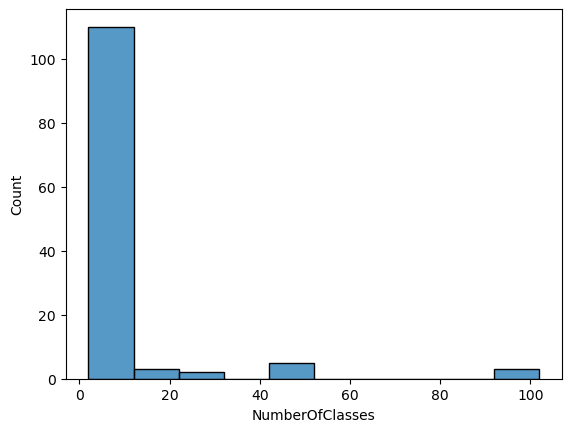

In [6]:
sns.histplot(openml_data_df.NumberOfClasses, bins=10)


<AxesSubplot: xlabel='NumberOfInstances', ylabel='Count'>

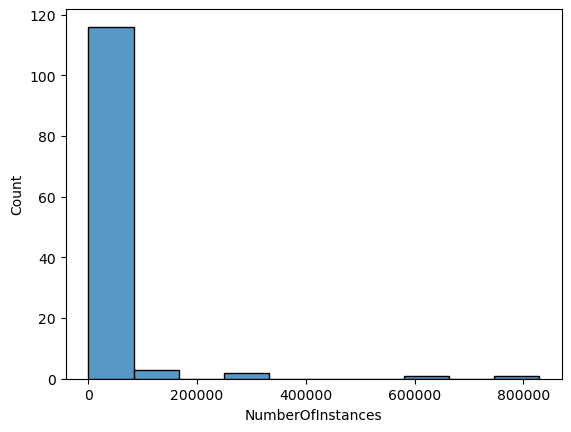

In [7]:
sns.histplot(openml_data_df.NumberOfInstances, bins=10)

<AxesSubplot: xlabel='NumberOfFeatures', ylabel='Count'>

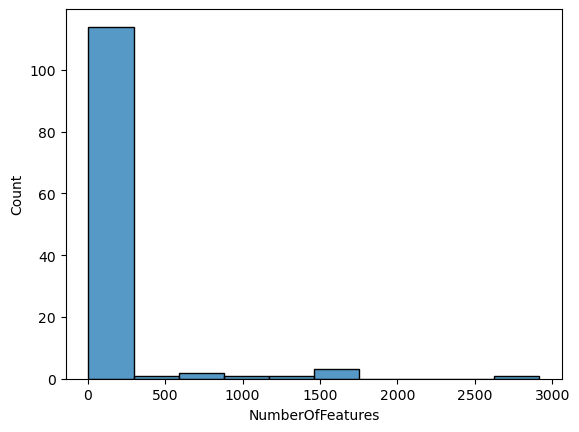

In [8]:
sns.histplot(openml_data_df.NumberOfFeatures, bins=10)

In [9]:
def get_datasets(df, dids):
    return df[df.did.isin(dids)]

<AxesSubplot: xlabel='NumberOfInstances', ylabel='Count'>

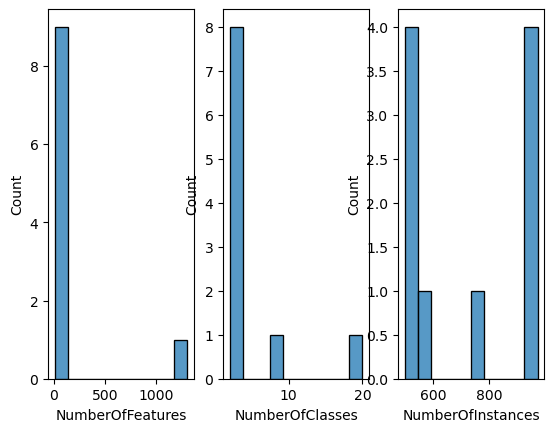

In [10]:
datagroup1 = openml_data_df[
    (openml_data_df.NumberOfInstances >= 1e2) &
    (openml_data_df.NumberOfInstances < 1e3) 
]
selected_datagroup1 = get_datasets(openml_data_df, [
    311,742,825,841,920,940,1515,1549,40693,40705
])
figure, axs = plt.subplots(ncols=3)
sns.histplot(selected_datagroup1.NumberOfFeatures, bins=10, ax = axs[0])
sns.histplot(selected_datagroup1.NumberOfClasses, bins=10, ax = axs[1])
sns.histplot(selected_datagroup1.NumberOfInstances, bins=10, ax = axs[2])

<AxesSubplot: xlabel='NumberOfInstances', ylabel='Count'>

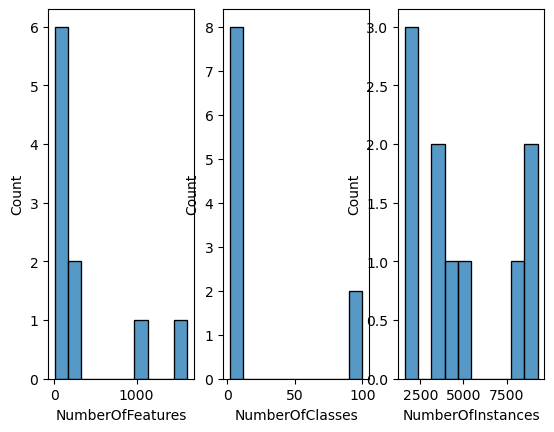

In [11]:
datagroup2 = openml_data_df[
    (openml_data_df.NumberOfInstances >= 1e3) &
    (openml_data_df.NumberOfInstances < 1e4) 
]
selected_datagroup2 = get_datasets(openml_data_df, [
    833,1039,1491,1492,1541,40645,40677,41082,41144,42193
])
figure, axs = plt.subplots(ncols=3)
sns.histplot(selected_datagroup2.NumberOfFeatures, bins=10, ax = axs[0])
sns.histplot(selected_datagroup2.NumberOfClasses, bins=10, ax = axs[1])
sns.histplot(selected_datagroup2.NumberOfInstances, bins=10, ax = axs[2])

<AxesSubplot: xlabel='NumberOfInstances', ylabel='Count'>

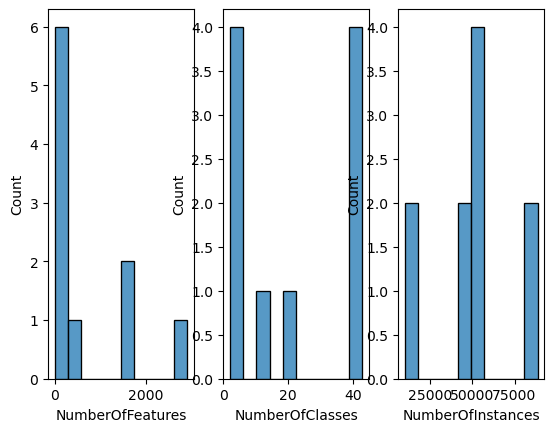

In [12]:
datagroup3 = openml_data_df[
    (openml_data_df.NumberOfInstances >= 1e4) &
    (openml_data_df.NumberOfInstances < 1e5) 
]
selected_datagroup3 = get_datasets(openml_data_df, [
    279,981,1536,40922,40985,41986,41988,41989,41990,42343
])
figure, axs = plt.subplots(ncols=3)
sns.histplot(selected_datagroup3.NumberOfFeatures, bins=10, ax = axs[0])
sns.histplot(selected_datagroup3.NumberOfClasses, bins=10, ax = axs[1])
sns.histplot(selected_datagroup3.NumberOfInstances, bins=10, ax = axs[2])

<AxesSubplot: xlabel='NumberOfInstances', ylabel='Count'>

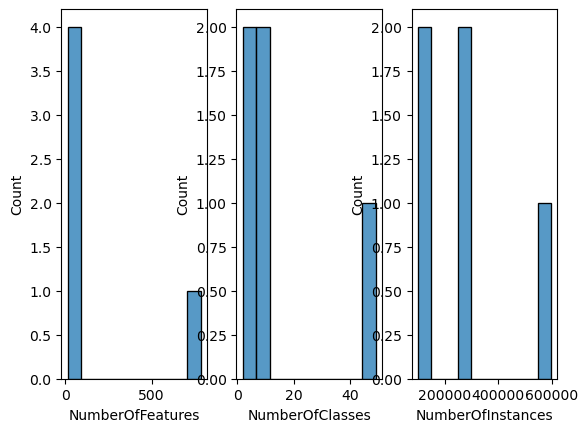

In [13]:
datagroup4 = openml_data_df[
    (openml_data_df.NumberOfInstances >= 1e5) &
    (openml_data_df.NumberOfInstances < 1e6) 
]
selected_datagroup4 = get_datasets(openml_data_df, [
    1503,4541,40672,41991,42206
])
figure, axs = plt.subplots(ncols=3)
sns.histplot(selected_datagroup4.NumberOfFeatures, bins=10, ax = axs[0])
sns.histplot(selected_datagroup4.NumberOfClasses, bins=10, ax = axs[1])
sns.histplot(selected_datagroup4.NumberOfInstances, bins=10, ax = axs[2])

In [14]:
selected_datasets = pd.concat([selected_datagroup1, selected_datagroup2, selected_datagroup3, selected_datagroup4])
print(len(selected_datasets))
selected_datasets

35


,did,name,NumberOfFeatures,NumberOfInstances,NumberOfClasses
10,311,oil_spill,50,937,2
23,742,fri_c4_500_100,101,500,2
37,825,boston_corrected,21,506,2
42,841,stock,10,950,2
50,920,fri_c2_500_50,51,500,2
55,940,water-treatment,37,527,2
72,1515,micro-mass,1301,571,20
84,1549,autoUniv-au6-750,41,750,8
100,40693,xd6,10,973,2
102,40705,tokyo1,45,959,2


<AxesSubplot: xlabel='NumberOfInstances', ylabel='Count'>

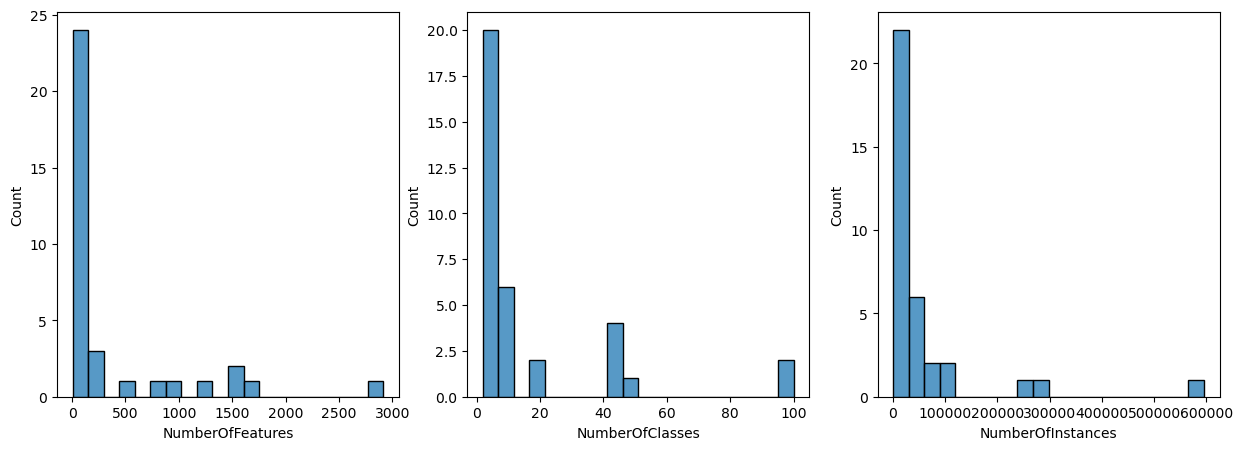

In [15]:
figure, axs = plt.subplots(ncols=3, figsize = (15, 5))
sns.histplot(selected_datasets.NumberOfFeatures, bins=20, ax = axs[0])
sns.histplot(selected_datasets.NumberOfClasses, bins=20, ax = axs[1])
sns.histplot(selected_datasets.NumberOfInstances, bins=20, ax = axs[2])

In [16]:
selected_datasets.did.tolist()

[311,
 742,
 825,
 841,
 920,
 940,
 1515,
 1549,
 40693,
 40705,
 833,
 1039,
 1491,
 1492,
 1541,
 40645,
 40677,
 41082,
 41144,
 42193,
 279,
 981,
 1536,
 40922,
 40985,
 41986,
 41988,
 41989,
 41990,
 42343,
 1503,
 4541,
 40672,
 41991,
 42206]

In [17]:
print(selected_datasets.NumberOfInstances.max())
print(selected_datasets.NumberOfFeatures.max())

595212
2917


In [18]:
datagroup4.to_csv(f'{root_dir}/tabpfn_training_amueller/mothernet/trials/datagroup4.csv', index=False)